# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [15]:
x = np.random.randint(5, size=(3,3))
print("La matriz es: \n",x)


def norms(p):
    size = len(x)
    for i in range(size):
        if p != 0 and p != np.inf:
            norm_p = np.sum(abs(x[i]) ** p) ** (1/p)
            if p == 1:
                print(f"Las norma l1 del vector {i+1}: ",norm_p)
            else:
                print(f"Las normas l2 de los vector {i+1}: ",norm_p)
        elif p == 0:
            norm_p = np.sum(abs(x[i]) != 0) #cantidad de elementos no nulos
            print(f"Las norma l0 de los vector {i+1}: ",norm_p)
        else:
            norm_p = np.max((abs(x[i])))
            print(f"La norma inf del vector {i+1}: ",norm_p)
    return 0

#norm l1
p_l1 = 1
norms(p_l1)

#norm l2
p_l2 = 2
norms(p_l2)

#norm l0
p_l0 = 0
norms(p_l0)

#norm inf
p_linf = np.inf
norms(p_linf)

La matriz es: 
 [[1 0 1]
 [1 0 1]
 [4 3 0]]
Las norma l1 del vector 1:  2.0
Las norma l1 del vector 2:  2.0
Las norma l1 del vector 3:  7.0
Las normas l2 de los vector 1:  1.4142135623730951
Las normas l2 de los vector 2:  1.4142135623730951
Las normas l2 de los vector 3:  5.0
Las norma l0 de los vector 1:  2
Las norma l0 de los vector 2:  2
Las norma l0 de los vector 3:  2
La norma inf del vector 1:  1
La norma inf del vector 2:  1
La norma inf del vector 3:  4


0

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [16]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

#using logical AND to get the TP op: 1 and 1 = true
compare01_and = np.logical_and(truth,prediction)
print(compare01_and)
#seeking true values and sum them to get tp
tp_rate = len(compare01_and[np.nonzero(compare01_and == 1)])
print("TP: ",tp_rate)

#using logical OR since there should be just one false = 0 or 0 
compare02 = np.logical_or(truth,prediction)
print(compare02)
#seeking true values and sum them to get tn
tn_rate = len(compare02[np.nonzero(compare02 == 0)])
print("TN: ",tn_rate)

#using XOR against first AND vs truth array will give me FN
compare03 = np.logical_xor(compare01_and,truth)
print(compare03)
#getting the rate of FN
fn_rate = len(compare03[np.nonzero(compare03 == 1)])
print("FN: ",fn_rate)

compare04 = np.logical_xor(compare01_and,prediction)
print(compare04)
fp_rate = len(compare04[np.nonzero(compare04 == 1)])
print("FP: ",fp_rate)

precision = (tp_rate)/(tp_rate + fp_rate)
recall = (tp_rate)/(tp_rate + fn_rate)
accuracy = (tp_rate + tn_rate)/(tp_rate + tn_rate + fp_rate + fn_rate)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

[ True  True False  True False False False False False False]
TP:  3
[ True  True  True  True  True  True  True  True False  True]
TN:  1
[False False False False  True  True False False False  True]
FN:  3
[False False  True False False False  True  True False False]
FP:  3
Precision: 0.5, Recall: 0.5, Accuracy: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [ ]:
# ejercicio 3

## Segunda Parte (Clase 3 y 4)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [8]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [9]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


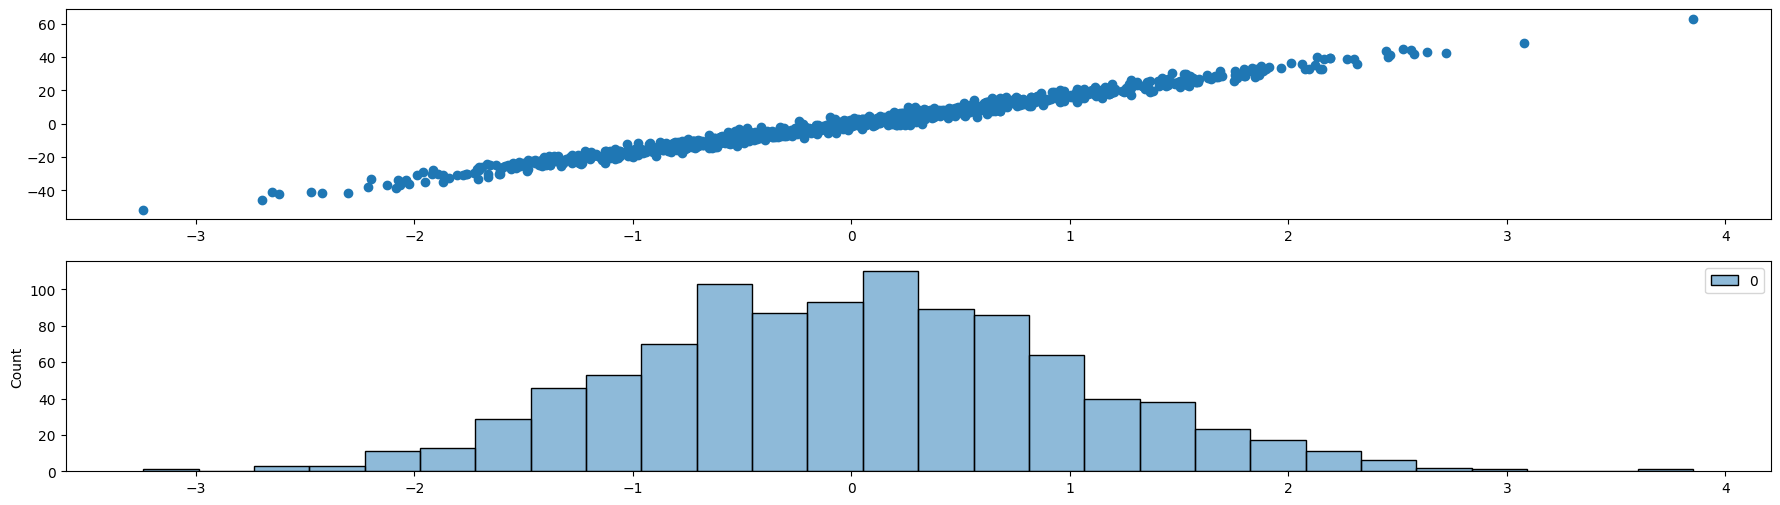

In [10]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [12]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [13]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

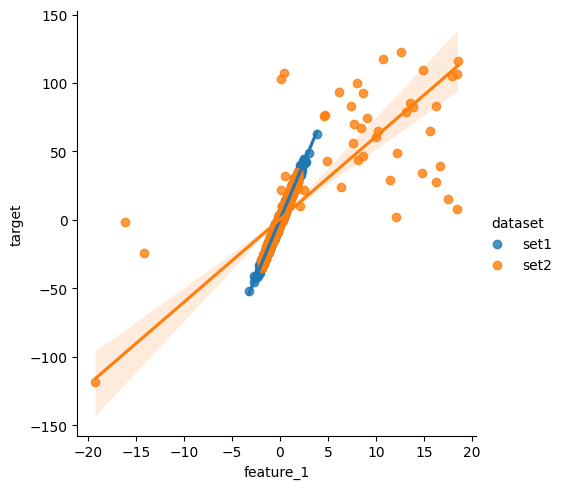

In [14]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [17]:
import pandas as pd
import numpy as np

In [18]:
def split(df: pd.DataFrame, train_percentage: float, test_percentage: float):
    
    #defining X
    x_layer = df['Number-of-cars']
    #defining y
    y_layer = df['Rush-hour']

    np.random.seed(0)
    df_length = len(df)
    train_size = int(df_length * train_percentage)

    #Permuting rows in the dataset to avoid any kind of pattern
    permute_index = np.random.permutation(df_length)
    #get train data using slicing
    train_df = permute_index[0:train_size]
    print(f"trianing rows {train_df}")
    #get validation data using slicing
    valid_df = permute_index[train_size:int(df_length - test_percentage * df_length)]
    print(f"validation rows {valid_df}")
    #get test data
    test_df = permute_index[int(df_length - test_percentage * df_length):df_length]
    print(f"test rows{test_df}")

    print("Total training data: ",len(train_df))
    print("Total validation data: ",len(valid_df))
    print("Total test data: ",len(test_df))
    
    #X train-validation-test
    X_train = x_layer[train_df]
    X_val = x_layer[valid_df]
    X_test = x_layer[test_df]

    #X train-validation-test
    Y_train = y_layer[train_df]
    Y_val = y_layer[valid_df]
    Y_test =y_layer[test_df]

    return  X_train, X_val, X_test, Y_train, Y_val, Y_test

#Generating data
num_car = np.random.randint(5,200, size=(15))
rush_hour = np.random.binomial(1,0.5,size=[15])
data = {'Number-of-cars': num_car, 
        'Rush-hour': rush_hour}
#print(f"Generating data:\n {data}\n")
#Generating data frame
dataset = pd.DataFrame(data)
print(f"Dataset:\n {dataset}\n")
#training size
train_percentage = 0.7
print(f"training percentage: {train_percentage}")
#test size
test_percentage = 0.1
print(f"test percentage: {test_percentage}")

#splitting dataset in train, validation and test
X_train, X_val, X_test, Y_train, Y_val, Y_test = split(dataset, train_percentage, test_percentage)

Dataset:
     Number-of-cars  Rush-hour
0               84          1
1              180          1
2              197          0
3               87          0
4              104          1
5              182          0
6               34          1
7              152          0
8              152          1
9              147          1
10             172          1
11              37          1
12             198          1
13              14          0
14             190          0

training percentage: 0.7
test percentage: 0.1
trianing rows [ 1  6  8  9 14  4  2 13 10  7]
validation rows [11  3  0]
test rows[ 5 12]
Total training data:  10
Total validation data:  3
Total test data:  2


### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
* Uno normal con poco `noise` y pocos outliers
* Uno con mucho `noise` y pocos outliers
* Uno con poco `noise` y muchos outliers
* Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

# Crear datasets
from sklearn.datasets import make_regression

In [24]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [34]:
# Creamos funcion que arma dataset
def dataset_build(samples: int, feature: int, noi: int, infor: int, random: int):
    x_input01, y_output01 = make_regression(n_samples = samples,
                        n_features = feature,
                        noise = noi,
                        n_informative = infor,
                        random_state = random)

    data = np.append(x_input01,y_output01.reshape(-1,1),axis=1)

    df = pd.DataFrame(data)

    new_col = []
    i = 0
    for col in df.columns:
        if i ==  len(df.columns) - 1:
            new_col.append("target")
        else :
            new_col.append("feature_" + str(i+1))
        i += 1
        
    df.columns = new_col
    return df

In [42]:
#Dataset normal con poco noise y pocos outliers
dataset_01 = dataset_build(samples = 1000, feature = 2, noi = 2, infor = 3, random = 42)
dataset_01.head()

,feature_1,feature_2,target
0,-0.167118,0.146714,-7.667415
1,-0.020902,0.117327,-2.596771
2,0.150419,0.364961,10.381293
3,0.555604,0.089581,19.900564
4,0.058209,-1.142970,-6.979118


In [38]:
#Dataset con mucho noise y pocos outliers
dataset_02 = dataset_build(samples = 1000, feature = 3, noi = 100, infor = 1, random = 42)
dataset_02.head()

,feature_1,feature_2,feature_3,target
0,-0.189120,-1.330314,0.921650,-34.877416
1,-0.653329,-0.474945,1.765454,-68.745357
2,-0.224856,0.076852,-0.650003,51.381310
3,0.570599,-0.662624,-0.763259,-1.732634
4,0.327880,-0.125454,0.085893,-135.210965


In [45]:
#Dataset con poco noise y muchos outliers
dataset_03 = dataset_build(samples = 1000, feature = 100, noi = 2, infor = 50, random = 42)
dataset_03.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,target
0,-0.324738,1.905905,0.382882,0.896614,-0.213846,-2.019286,-0.039268,-1.006733,-2.089233,-0.422321,...,-1.078851,2.764349,-0.431317,-1.825635,-0.230766,-0.624095,0.876371,0.671192,0.447822,172.736237
1,1.161267,-0.779928,1.224258,-0.593205,1.470130,-0.145885,-0.720259,-0.768811,0.460683,0.206755,...,-0.624292,-1.477340,0.003973,0.487645,1.318580,0.239591,0.435529,1.204499,0.267728,-36.707150
2,-0.098845,0.252569,-1.171654,0.569760,0.195482,-1.255135,-0.077221,0.522251,-2.929449,-1.336725,...,0.664927,-0.361311,0.207803,0.695402,-2.603137,2.046862,0.418206,-0.614123,-0.477646,389.906062
3,-0.950890,-1.633886,-0.681996,-1.201104,1.916263,0.284127,-0.487450,-0.800161,0.969022,0.002130,...,0.187553,0.503798,-0.970735,-0.403422,-0.445155,-0.647852,0.054882,-0.430724,0.835615,-247.308417
4,-1.532942,0.011581,-0.525396,-0.785818,2.542034,0.086399,1.008111,0.171918,-1.331512,-2.102958,...,-1.210553,-0.806277,0.933262,1.272665,-1.276386,0.549241,-1.145878,-0.889108,0.005471,247.205437


In [46]:
#Dataset con mucho noise y muchos outliers
dataset_04 = dataset_build(samples = 1000, feature = 100, noi = 100, infor = 50, random = 42)
dataset_04.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,target
0,-0.324738,1.905905,0.382882,0.896614,-0.213846,-2.019286,-0.039268,-1.006733,-2.089233,-0.422321,...,-1.078851,2.764349,-0.431317,-1.825635,-0.230766,-0.624095,0.876371,0.671192,0.447822,194.396548
1,1.161267,-0.779928,1.224258,-0.593205,1.470130,-0.145885,-0.720259,-0.768811,0.460683,0.206755,...,-0.624292,-1.477340,0.003973,0.487645,1.318580,0.239591,0.435529,1.204499,0.267728,-87.298052
2,-0.098845,0.252569,-1.171654,0.569760,0.195482,-1.255135,-0.077221,0.522251,-2.929449,-1.336725,...,0.664927,-0.361311,0.207803,0.695402,-2.603137,2.046862,0.418206,-0.614123,-0.477646,371.285936
3,-0.950890,-1.633886,-0.681996,-1.201104,1.916263,0.284127,-0.487450,-0.800161,0.969022,0.002130,...,0.187553,0.503798,-0.970735,-0.403422,-0.445155,-0.647852,0.054882,-0.430724,0.835615,-94.164596
4,-1.532942,0.011581,-0.525396,-0.785818,2.542034,0.086399,1.008111,0.171918,-1.331512,-2.102958,...,-1.210553,-0.806277,0.933262,1.272665,-1.276386,0.549241,-1.145878,-0.889108,0.005471,163.835967


In [49]:
df_outlier = generate_outliers(dataset_01,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

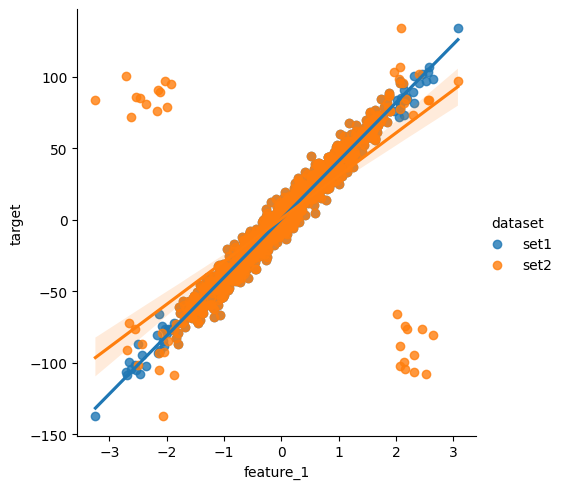

In [48]:
sns.lmplot(data = pd.concat([dataset_01.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`